# Importando bibliotecas

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sn
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
import numpy as np
import pandas as pd
import cv2
import mediapipe as mp
import io
from PIL import Image
from IPython.display import clear_output
import kagglehub

# Modelo [Hemg/Indian-sign-language-classification](https://huggingface.co/Hemg/Indian-sign-language-classification)

In [2]:
image_processor = AutoImageProcessor.from_pretrained("Hemg/Indian-sign-language-classification")
model = AutoModelForImageClassification.from_pretrained("Hemg/Indian-sign-language-classification")

# Teste web cam (opencv, mediapipe)

Adaptado de um [repositório](https://github.com/WellingtonDev25/leitor_libras) do GitHub.

In [3]:
cap = cv2.VideoCapture(0)
hands = mp.solutions.hands.Hands(max_num_hands=2)

try:
    while True:
        success, img = cap.read()
        
        if not success:
            continue
    
        frameRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        results = hands.process(frameRGB)
        handsPoints = results.multi_hand_landmarks
        h, w, _ = img.shape
    
        if handsPoints != None:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for hand in handsPoints:
                for lm in hand.landmark:
                    x, y = int(lm.x * w), int(lm.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                        
            cv2.rectangle(img, (x_min-50, y_min-50), (x_max+50, y_max+50), (0, 255, 0), 2)
    
            try:
                imgCrop = img[y_min-50:y_max+50,x_min-50:x_max+50]
                imgCrop = cv2.resize(imgCrop,(224,224))
        
                inputs = image_processor(imgCrop, return_tensors="pt")
                with torch.no_grad():
                    logits = model(**inputs).logits
                
                predicted_label = logits.argmax(-1).item()
                
                # Baseado em: https://gist.github.com/xcsrz/8938a5d4a47976c745407fe2788c813a
                text_size = cv2.getTextSize(model.config.id2label[predicted_label], cv2.FONT_HERSHEY_COMPLEX, 3, 5)[0]
                
                text_x = int((img.shape[1] - text_size[0]) / 2)
                text_y = int(img.shape[0] - (text_size[0] / 2))

                cv2.putText(img, model.config.id2label[predicted_label], (text_x, text_y), cv2.FONT_HERSHEY_COMPLEX, 3, (0, 0, 255), 5)
            except:
                continue
                    
        cv2.imshow('Hugging Face - ViT - ISL', img)
        
        if cv2.waitKey(1) == 27: # ESC
            break
finally:
    cap.release()
    cv2.destroyAllWindows()

# Testes com imagens do [dataset](https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl?select=Indian) do usuário do Kaggle Prathum Arikeri

In [25]:
path = kagglehub.dataset_download("prathumarikeri/indian-sign-language-isl")
path = path + '/Indian/'
print("Caminho para os arquivos do dataset:", path)

Caminho para os arquivos do dataset: C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/


## Visualização do conjunto de dados

Os títulos das imagens são primeiro a classe daquela imagem e segundo o número pelo qual aquela classe é representada.

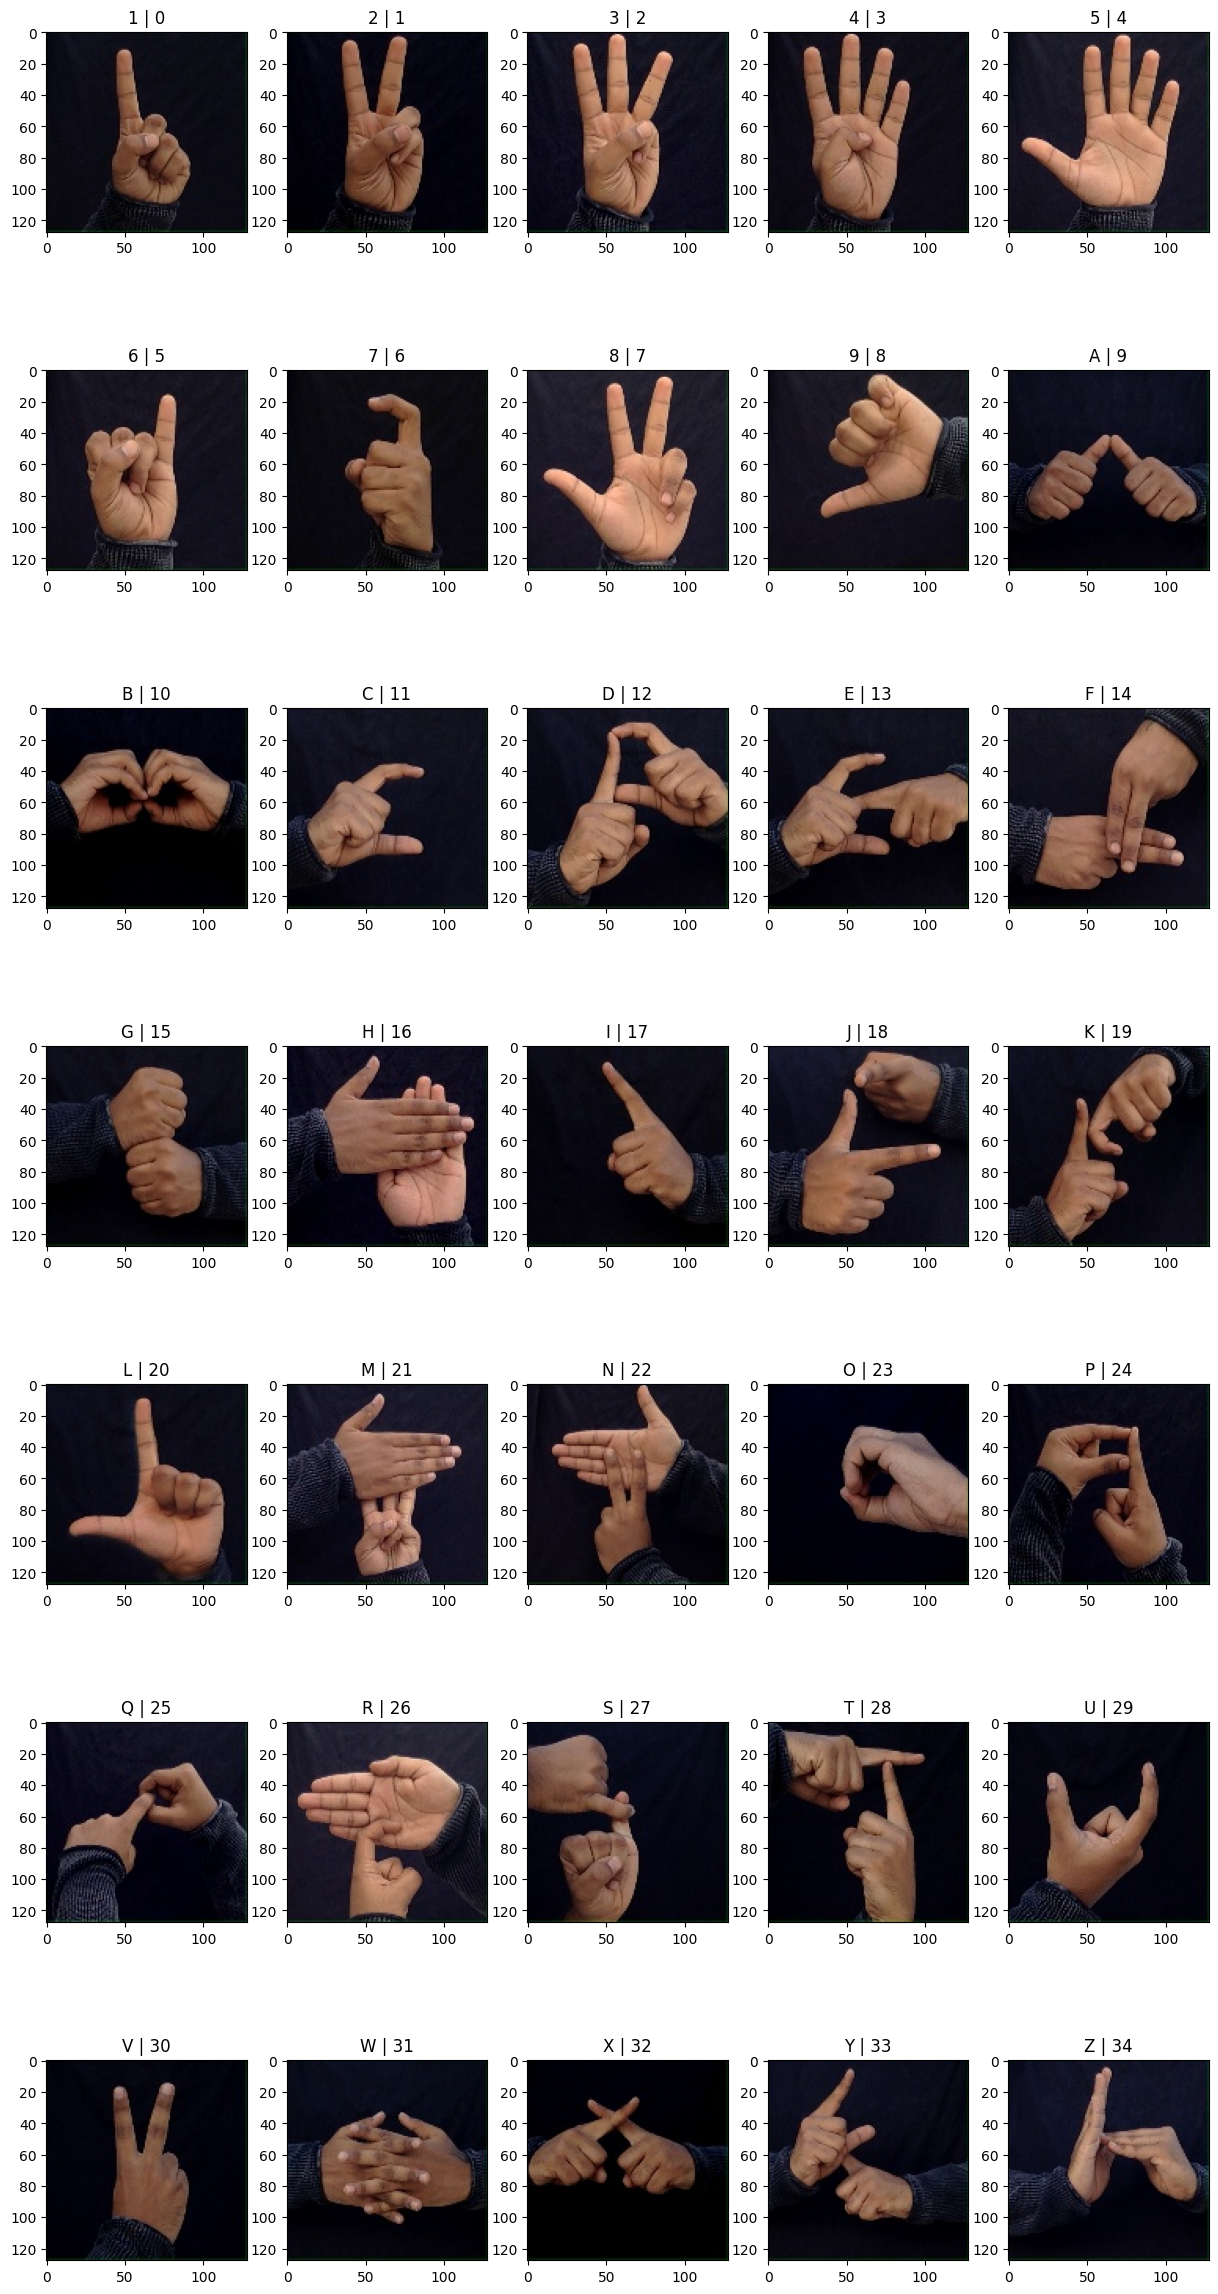

In [26]:
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(15, 30))

folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

x = 0
y = 0

for folder in folders:
    file_path = f'{path + folder}/0.jpg'
    img = mpimg.imread(file_path)

    ax[x][y].imshow(img)
    ax[x][y].set(title=f'{folder} | {int(model.config.label2id[folder])}')

    y += 1
    if y > 4:
        y = 0
        x += 1    

#plt.savefig('prathum_arikeri.png')
plt.show()

## Print das previsões sobre algumas imagens

In [7]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

number_of_images = 1

for folder in folders:
    for x in range(number_of_images):
        img = mpimg.imread(f'{path + folder}/{x}.jpg')
    
        inputs = image_processor(img, return_tensors="pt")
          
        with torch.no_grad():
            logits = model(**inputs).logits
        
        predicted_label = logits.argmax(-1).item()
        print(f'{path + folder}/{x}.jpg = {model.config.id2label[predicted_label]}')

C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/1/0.jpg = 1
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/2/0.jpg = 2
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/3/0.jpg = 3
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/4/0.jpg = 4
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/5/0.jpg = 5
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/6/0.jpg = 6
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/7/0.jpg = 7
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/8/0.jpg = 8
C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/9/0.jpg = 9
C

## Testando o modelo sobre o conjunto de dados

In [8]:
folders = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

number_of_images = 1200

y_pred = np.ndarray(shape=(0))
y_true = np.ndarray(shape=(0))

for folder in folders:
    clear_output(wait=True)
    print(path + folder)
    
    for x in range(number_of_images):
        img = mpimg.imread(f'{path + folder}/{x}.jpg')
    
        inputs = image_processor(img, return_tensors="pt")
          
        with torch.no_grad():
            logits = model(**inputs).logits
        
        predicted_label = logits.argmax(-1).item()
        
        y_pred = np.append(y_pred, predicted_label)
        y_true = np.append(y_true, int(model.config.label2id[folder]))

C:\Users\guilh\.cache\kagglehub\datasets\prathumarikeri\indian-sign-language-isl\versions\1/Indian/Z


## Geração e visualização das métricas

Acurácia: 1.0


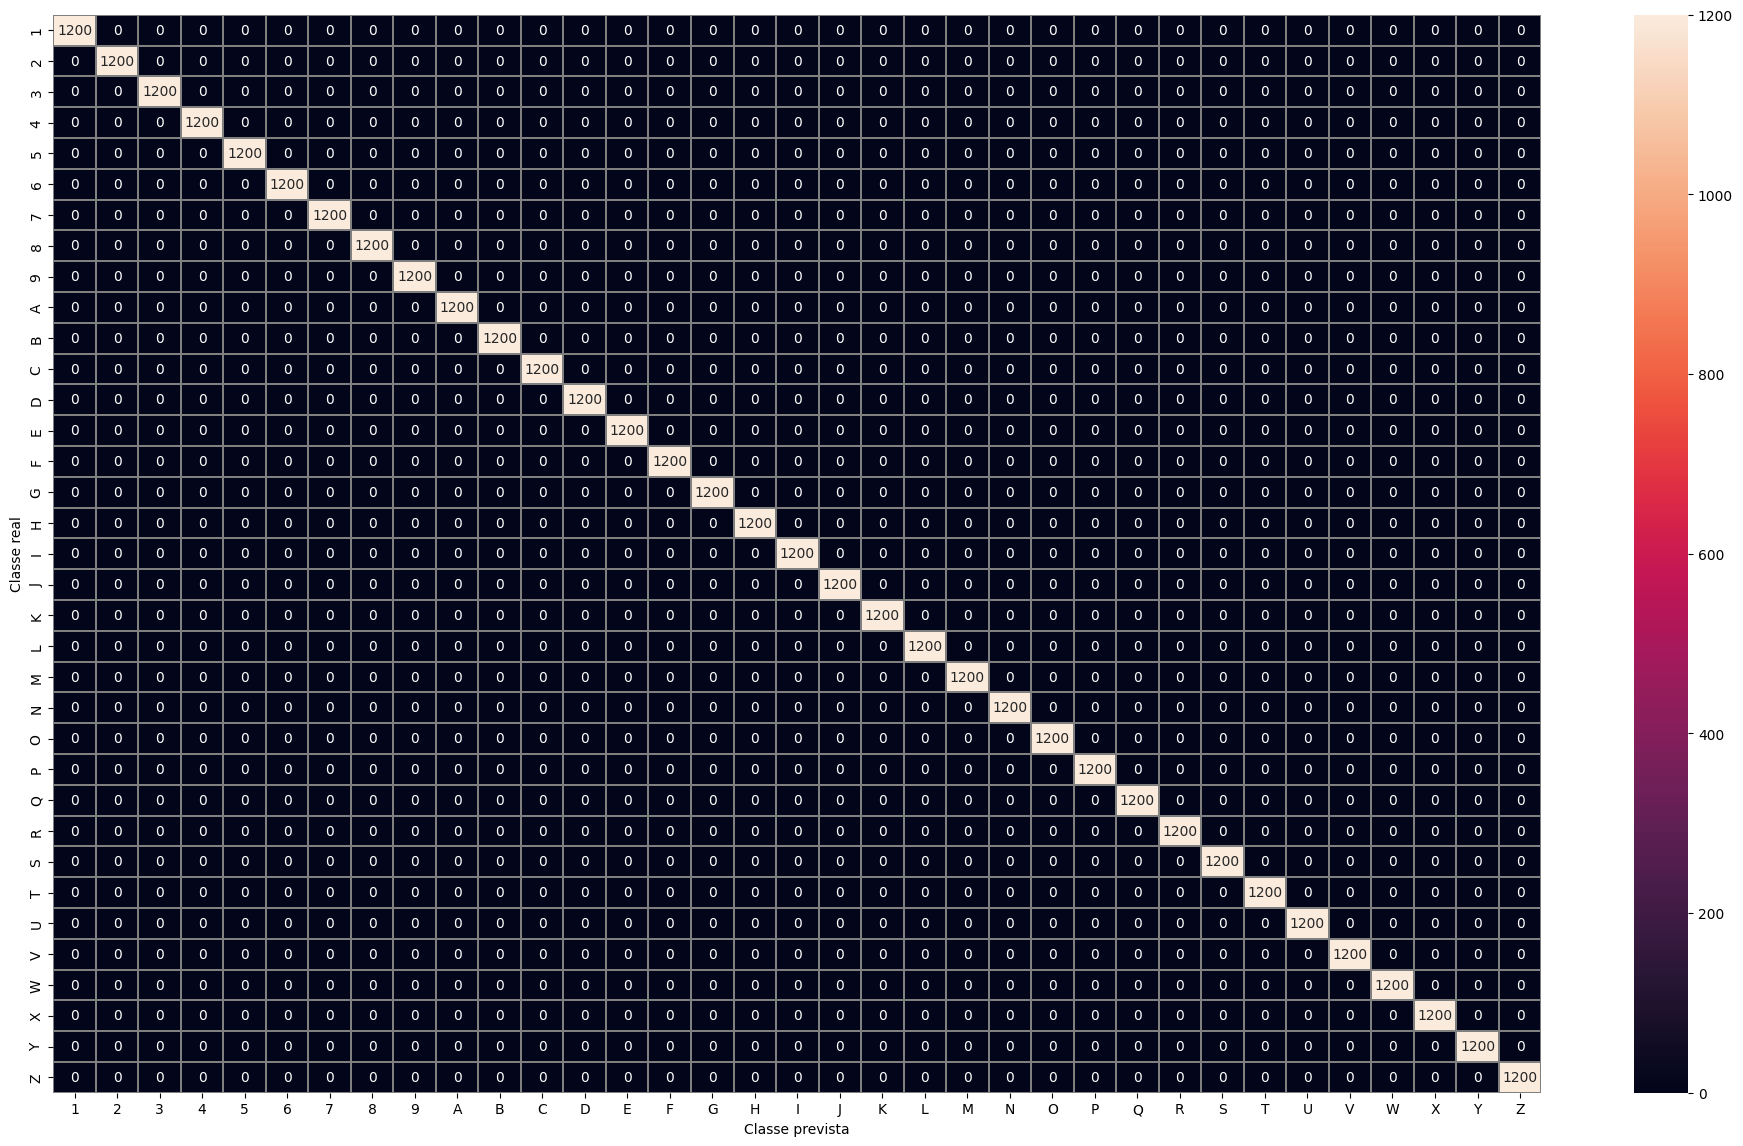

In [9]:
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

cf_matrix = confusion_matrix(y_true, y_pred, labels=[i for i in range(0, len(classes))])

df_cm = pd.DataFrame(cf_matrix, index=[i for i in classes], columns=[i for i in classes])

plt.figure(figsize = (24, 14))

sn.heatmap(df_cm, linewidths=.1, linecolor='gray', annot=True, fmt='d')

plt.xlabel('Classe prevista')
plt.ylabel('Classe real')
#plt.savefig('confusion_matrix_isl.png')

accuracy = accuracy_score(y_true, y_pred)

print(f'Acurácia: {accuracy}')

# Testes com imagens do [dataset](https://www.kaggle.com/datasets/soumyakushwaha/indian-sign-language-dataset) do usuário do Kaggle SOUMYA KUSHWAHA

In [ ]:
path = kagglehub.dataset_download("soumyakushwaha/indian-sign-language-dataset")

print("Caminho para os arquivos do dataset:", path)

path = path + '/ISL_Dataset/'

## Visualização do conjunto de dados

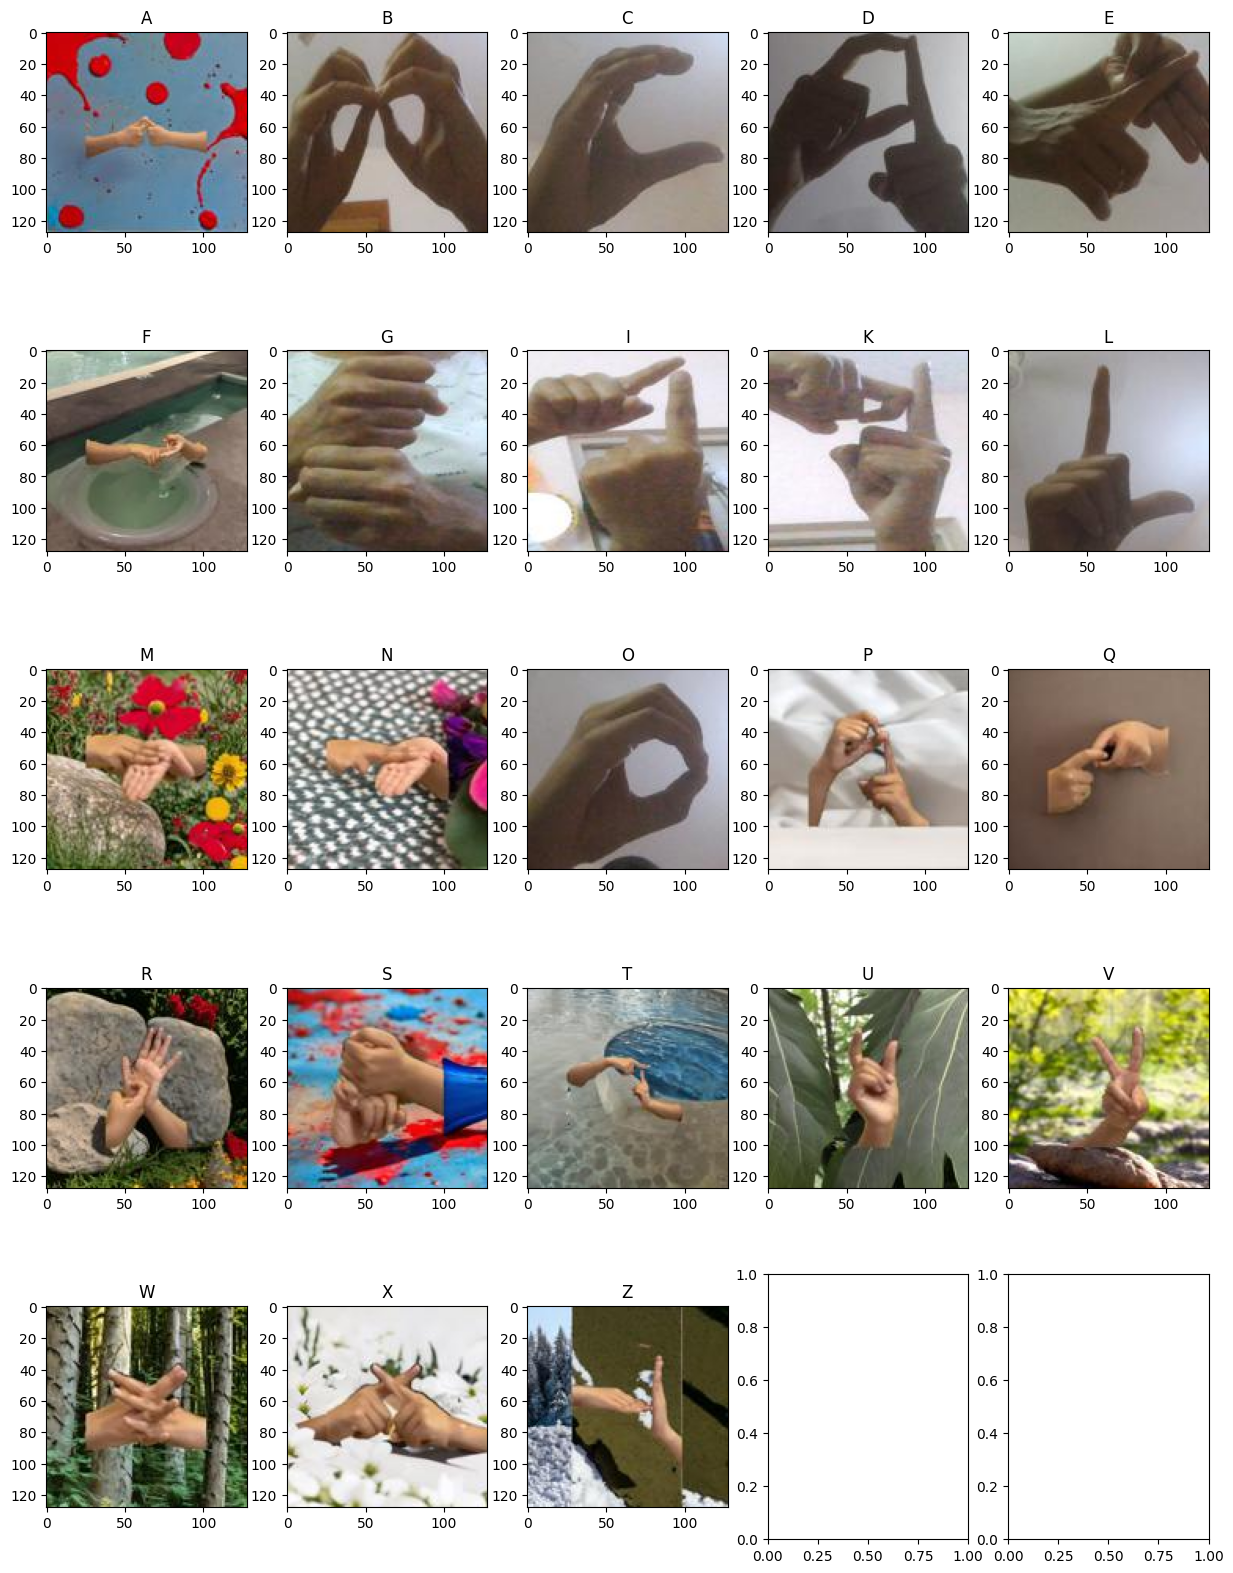

In [11]:
folders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Z']

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(15, 20))

x = 0
y = 0
for folder in folders:
    file_path = f'{path + folder}/{folder} (1).jpg'
    img = mpimg.imread(file_path)
    
    ax[x][y].imshow(img)
    ax[x][y].set(title=f'{folder}')

    y += 1
    if y > 4:
        y = 0
        x += 1

plt.show()

## Testando o modelo sobre o conjunto de dados

In [12]:
folders = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Z']
y_pred = []
y_true = []

for folder in folders:
    for x in range(1, 22):
        file_path = f'{path + folder}/{folder} ({x}).jpg'
        img = mpimg.imread(file_path)
    
        inputs = image_processor(img, return_tensors="pt")
          
        with torch.no_grad():
            logits = model(**inputs).logits
        
        predicted_label = logits.argmax(-1).item()

        y_pred.append(predicted_label)
        y_true.append(int(model.config.label2id[folder]))

    clear_output(wait=True)
    print(path + folder)

C:\Users\guilh\.cache\kagglehub\datasets\soumyakushwaha\indian-sign-language-dataset\versions\1/ISL_Dataset/Z


## Métricas do modelo

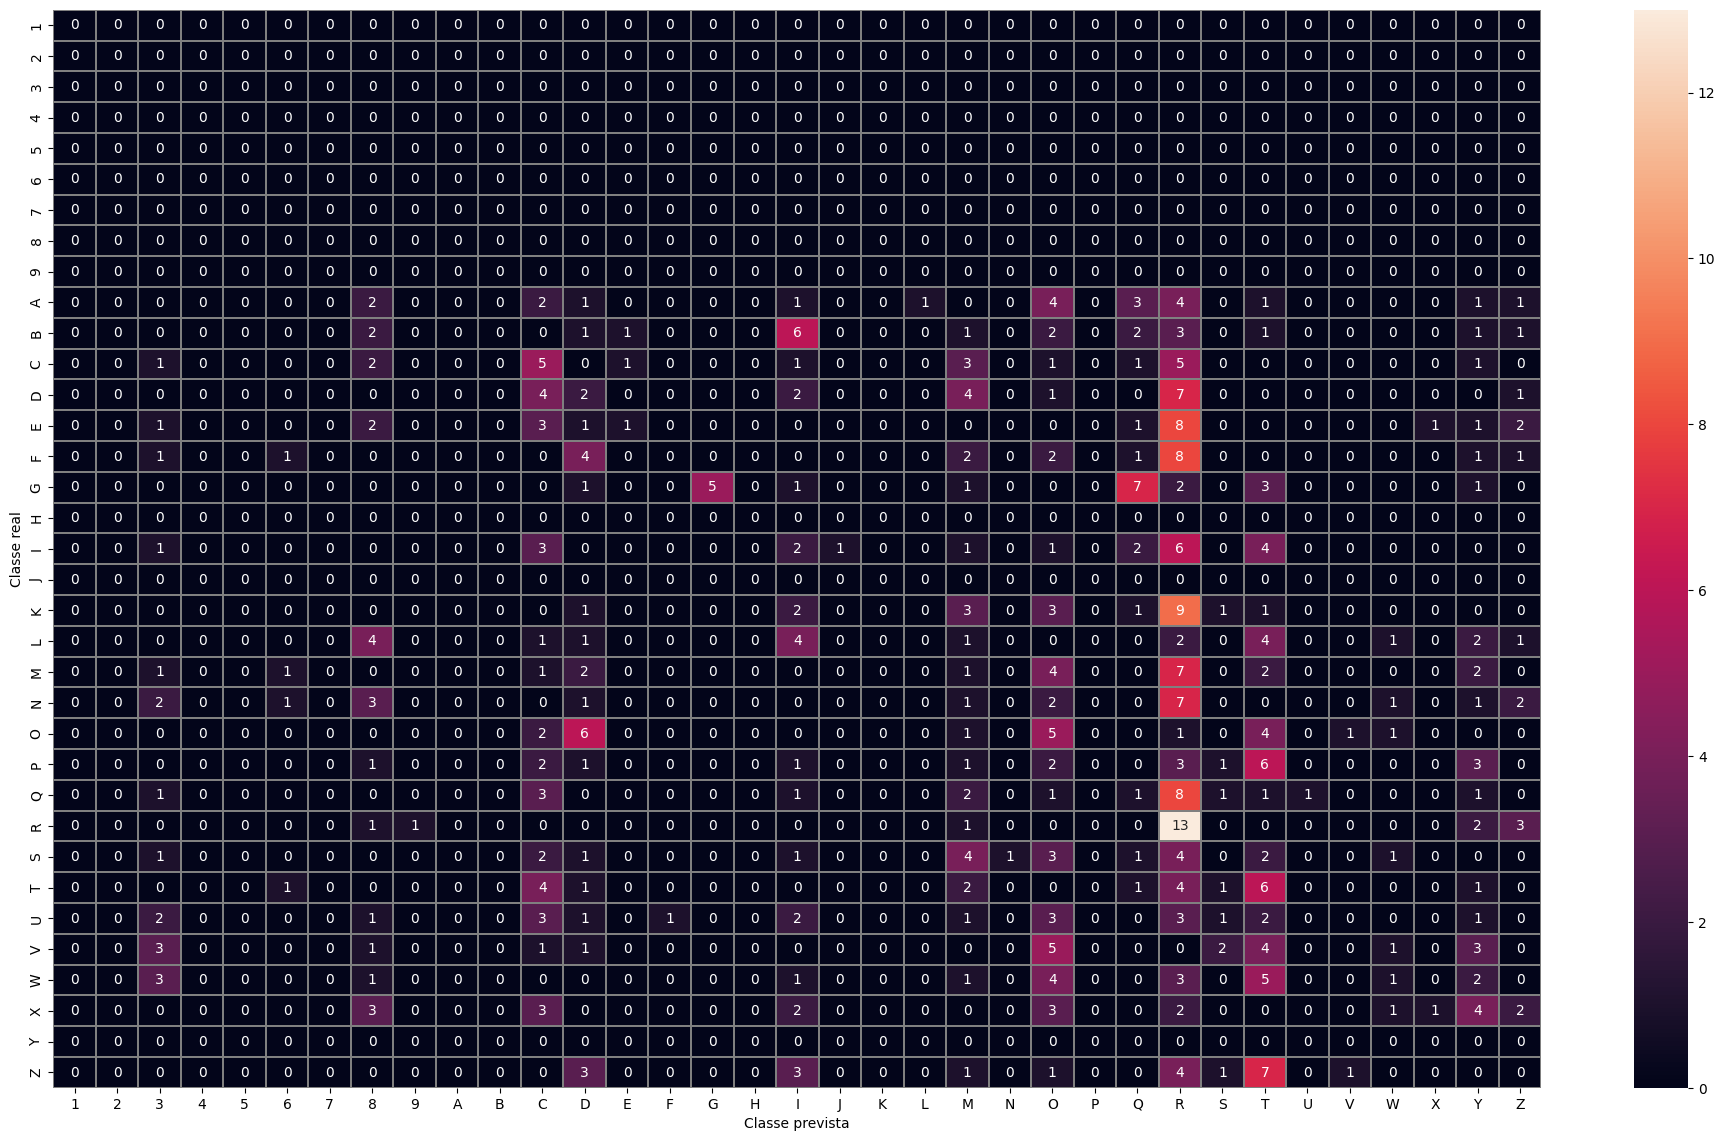

Acurácia: 0.08902691511387163


In [14]:
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

cf_matrix = confusion_matrix(y_true, y_pred, labels=[i for i in range(0, len(classes))])

df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes], columns = [i for i in classes])

plt.figure(figsize = (24,14))

sn.heatmap(df_cm, linewidths=.1, linecolor='gray', annot=True, fmt='d')

plt.xlabel('Classe prevista')
plt.ylabel('Classe real')

#plt.savefig('confusion_matrix_a.png')
plt.show()

accuracy = accuracy_score(y_true, y_pred)

print(f'Acurácia: {accuracy}')

# Testes com imagens do [dataset](https://huggingface.co/datasets/akritRihal/Indian_Sign_Language_dataset) do usuário do Hugging Face akritRihal

In [15]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/akritRihal/Indian_Sign_Language_dataset/" + splits["test"])

## Ajustando o conjunto de dados para conseguir dados utilizáveis

In [16]:
# Removendo o label 0 pois o modelo não o possui
df_aux = df.drop([index for index, row in df[df["label"] == 0].iterrows()])
df_aux[df_aux["label"] == 0]

Empty DataFrame
Columns: [image, label]
Index: []

In [17]:
# Remapeando os labels para o padrão esperado pelo modelo
label_mapping = {
    1: 0,
    2: 1,
    3: 2,
    4: 3,
    5: 4,
    6: 5,
    7: 6,
    8: 7,
    9: 8,
    10: 9,
    11: 10,
    12: 11,
    13: 12,
    14: 13,
    15: 14,
    16: 15,
    17: 17,
    18: 19,
    19: 20,
    20: 21,
    21: 22,
    22: 23,
    23: 24,
    24: 25,
    25: 26,
    26: 27,
    27: 28,
    28: 29,
    29: 31,
    30: 32,
    31: 33,
    32: 34
}

df_aux['label'] = df_aux['label'].replace(label_mapping)
df_aux.head()

image  label
0  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
1  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...     21
2  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...     26
3  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      2
4  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      8

## Visualizando o conjunto de dados

Os títulos das imagens são primeiro a classe daquela imagem e segundo o número pelo qual aquela classe é representada.

In [18]:
df_imagens = df_aux.drop_duplicates(subset="label", keep="last")
df_imagens = df_imagens.sort_values(by='label', ascending=True)
df_imagens.head()

image  label
1600  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
1558  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      1
1584  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      2
1565  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
1612  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      4

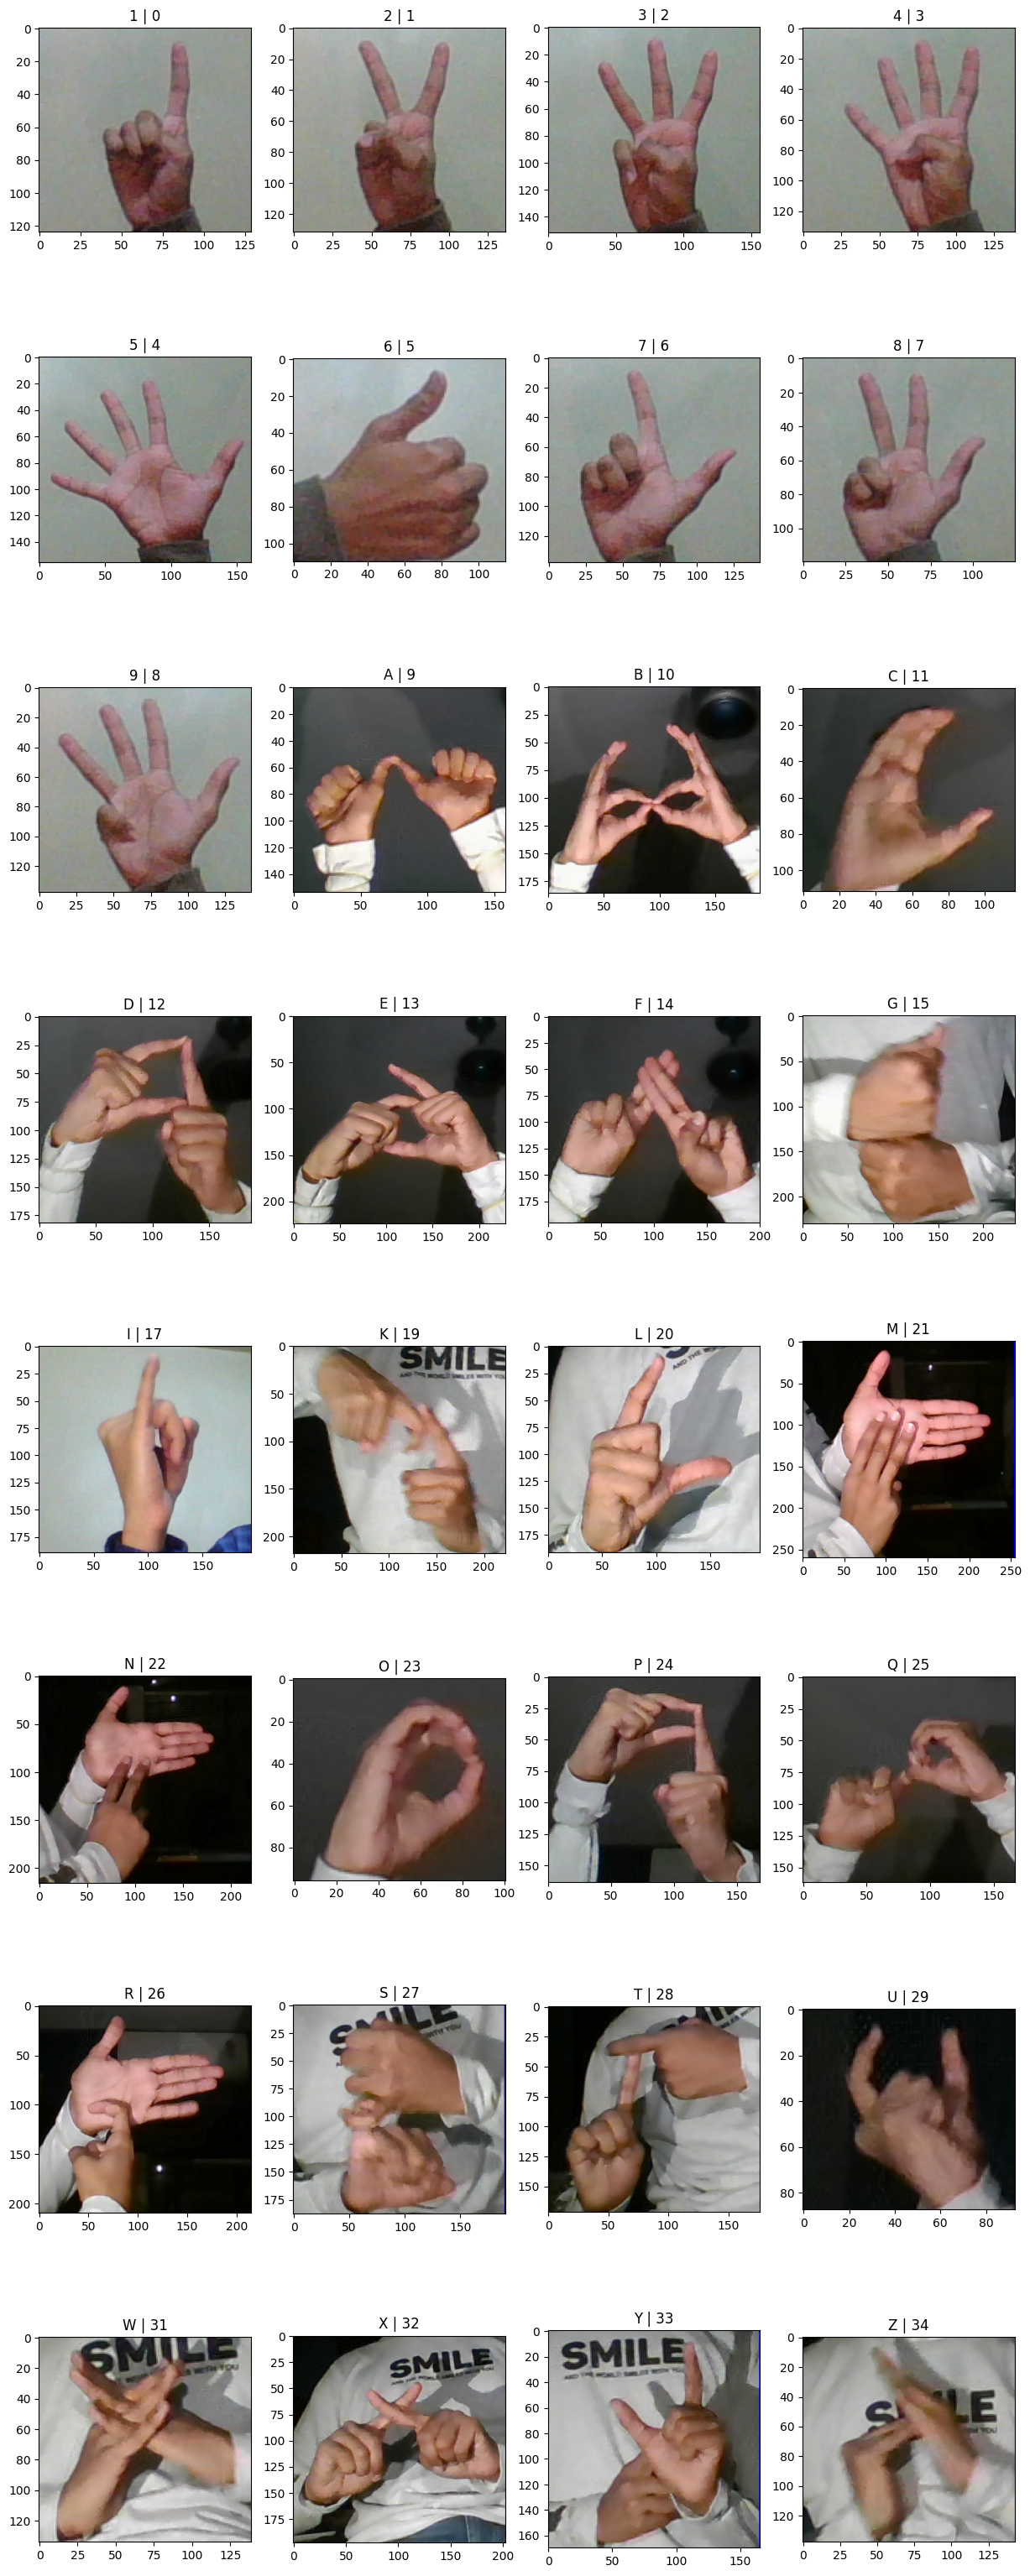

In [24]:
class_names = {
    0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A',
    10: 'B', 11: 'C', 12: 'D', 13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K',
    20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P', 25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U',
    30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'
}

fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(15, 40))

x = 0
y = 0
for index, row in df_imagens.iterrows():
    image = Image.open(io.BytesIO(row["image"]["bytes"]))
    image = np.array(image)
    
    ax[x][y].imshow(image)
    ax[x][y].set(title=f'{class_names[row["label"]]} | {row["label"]}')

    y += 1
    if y > 3:
        y = 0
        x += 1

#plt.savefig('akritRihal.png')
plt.show()

In [27]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1513 entries, 0 to 1612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   1513 non-null   object
 1   label   1513 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 35.5+ KB


## Métricas

In [28]:
y_pred = []
y_true = []

for index, row in df_aux.iterrows():
#for index, row in df_aux.head(100).iterrows():
    img = Image.open(io.BytesIO(row["image"]["bytes"]))
    img = np.array(img)
    img = cv2.resize(img, (128, 128))

    inputs = image_processor(img, return_tensors="pt")
        
    with torch.no_grad():
        logits = model(**inputs).logits
    
    predicted_label = logits.argmax(-1).item()

    y_pred.append(predicted_label)
    y_true.append(row["label"])

    clear_output(wait=True)
    print(f'{index}')

1612


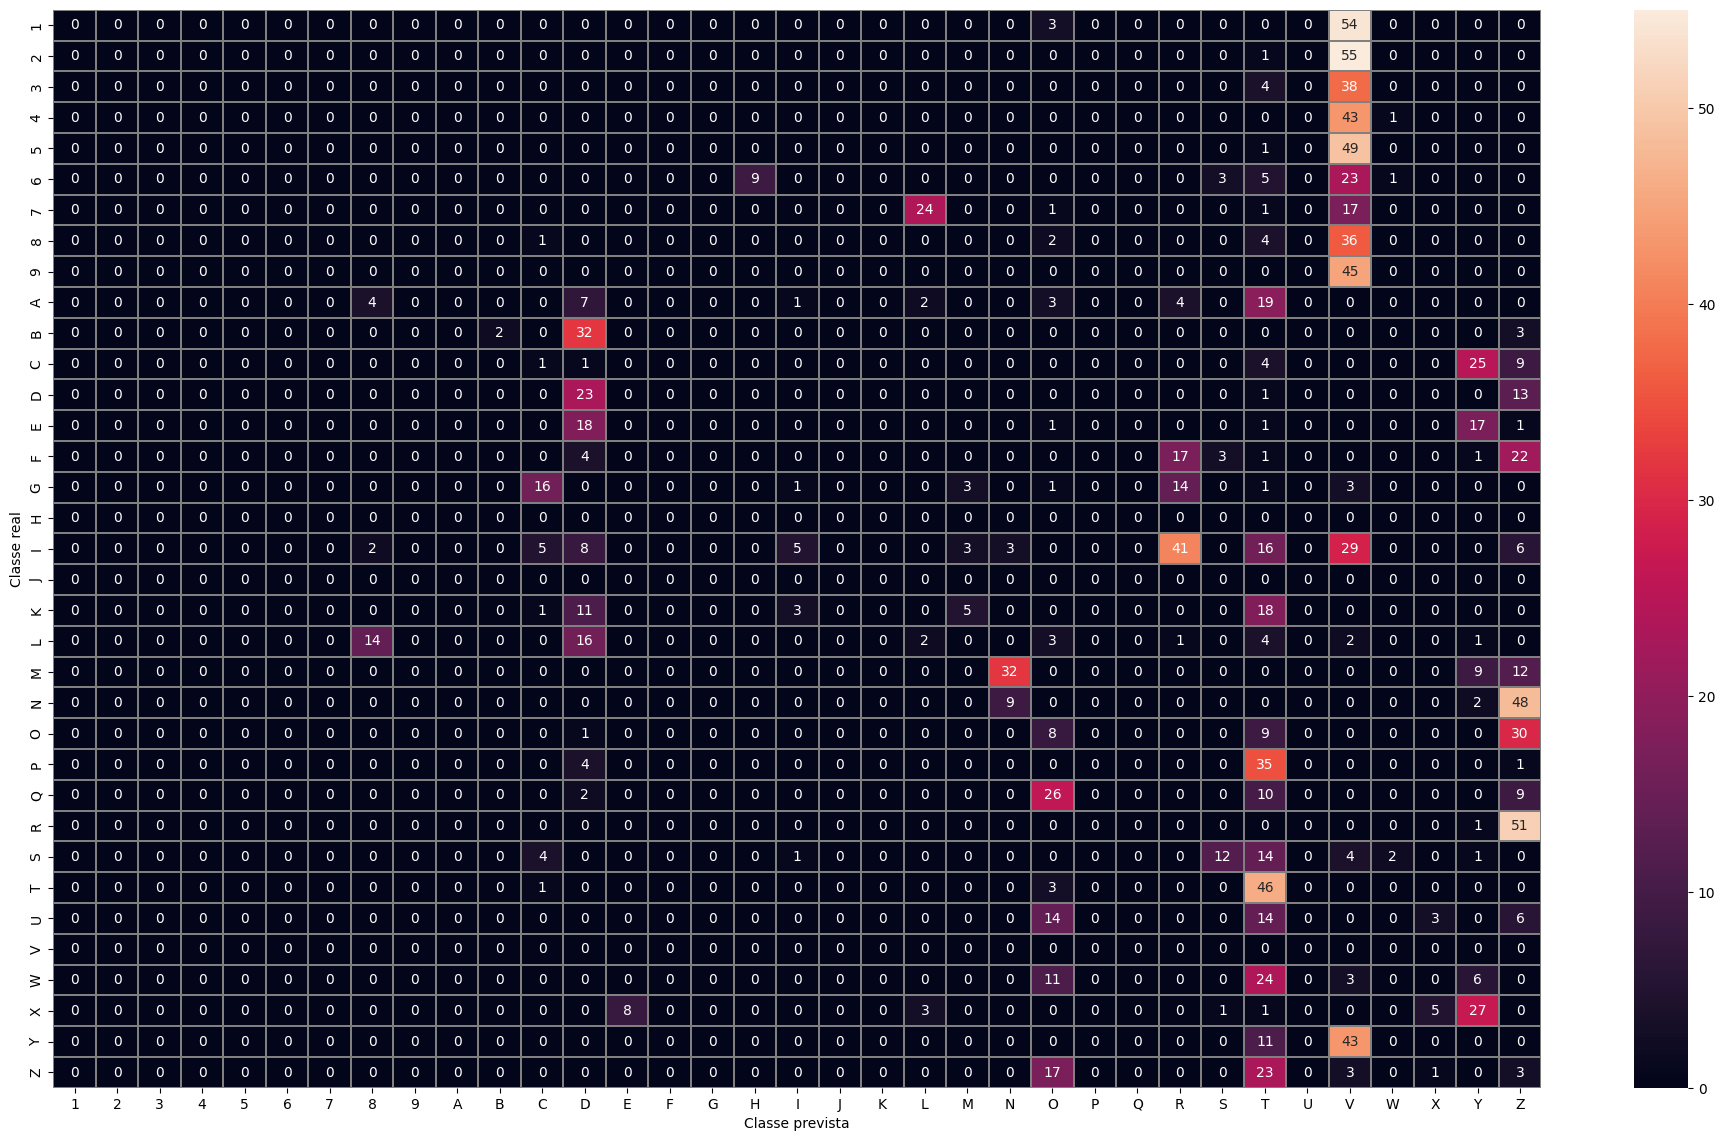

Acurácia: 0.07666886979510905


In [29]:
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

cf_matrix = confusion_matrix(y_true, y_pred, labels=[i for i in range(0, len(classes))])

df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes], columns = [i for i in classes])

plt.figure(figsize = (24,14))

sn.heatmap(df_cm, linewidths=.1, linecolor='gray', annot=True, fmt="d")

plt.xlabel('Classe prevista')
plt.ylabel('Classe real')

#plt.savefig('confusion_matrix.png')
plt.show()

accuracy = accuracy_score(y_true, y_pred)

print(f'Acurácia: {accuracy}')